In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Hilfsmethoden

In [3]:
def visualisierung(X, y, predictions=None, title=""):
    plt.plot(X, y, 'r.')
    if predictions is not None:
        plt.plot(predictions, '-b')
    plt.title(title)
    plt.grid()
    plt.show()

### Datensatz Generierung

In [4]:
# Y -> Transponiert
# Merkmalsvektor
Y = np.arange(0,14,1).reshape(14,1)
# Zielwert
z = np.array([[1], [3.9], [5.2], [8], [7.7], [7], [7.5], 
              [8.5], [9], [9], [12], [13.3], [12], [13.5]])

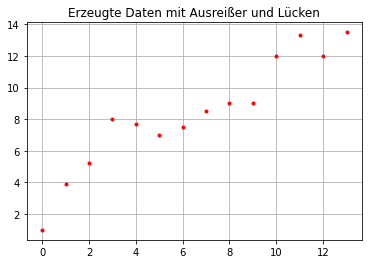

In [5]:
visualisierung(Y, z, title="Erzeugte Daten mit Ausreißer und Lücken")

# Aufgabe 1: Lineare Regression

In [6]:
class LinearRegression:
    def fit(self, Y, z):
        # Um zugrundeliegende Daten zu schätzen, erstelle f(x,a) = Y^T a = z (siehe Skript)
        # Y ist hierbei der Merkmalsvektor und z der Zielwert
        # slope und intercept sind die Parameter
        Y = np.c_[Y, np.ones(Y.shape)]
        # Wie in Skript: Umstellung zu a = (Y transponiert)+z
        # Unter Verwendung der Moore-Penrose Inverse erhalten wir intercept und slope
        Y_plus = np.linalg.pinv(Y)
        coefs = Y_plus.dot(z)
        self.y_intercept = coefs[1]
        self.slope = coefs[0]
        
    def predict(self, X):
        return self.slope * X + self.y_intercept

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(Y, z)
predictions = linear_regression.predict(Y)

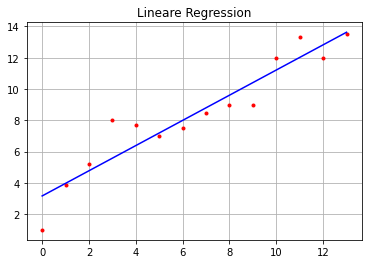

In [8]:
visualisierung(Y, z, predictions=predictions, title = "Lineare Regression")

Es ist zu beobachten, dass die lineare Funktion (in Blau visualisiert) Schwierigkeiten mit Ausreißern in den vorliegenden Daten aufweist. Es wird eine nicht lineare Funktion benötigt um die generierten Daten besser abdecken zu können.

# Aufgabe 2: Lineare Regression mit Polynomen

In [9]:
class PolynomialLinearRegression:
    def __init__(self, v=2): 
        # mit v = Grad der Polynomial Funktion
        self.v = v
        
    def fit(self, X, y):
        Y = []
        z = []
        # Dynamische Erstellung der Polynome basierend auf angegebenen Grad der Ploynomial Funktion
        for i in range(self.v+1):
            Y_row = []
            for j in range(self.v+1):
                Y_row.append(np.sum([x**(i+j) for x in X]))
            Y.append(Y_row)
            z.append(np.sum(np.multiply([x**i for x in X], y)))
        # Wie in Skript: Umstellung zu a = (Y^T)+z
        # Unter Verwendung der Moore-Penrose Inverse erhalten wir inverse und slope
        self.weights = np.linalg.pinv(np.transpose(Y)).dot(z)
    
    def predict(self, X): 
        prediction = [] 
        for x in X:
            prediction.append(np.sum([w_j * x**j for j, w_j in enumerate(self.weights)])) 
        return prediction

### Grad v=2

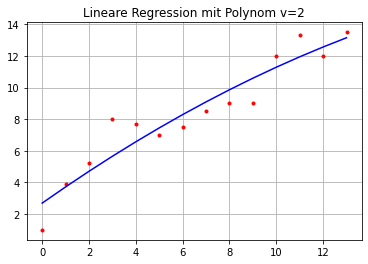

In [10]:
v = 2
poly_linear_regression = PolynomialLinearRegression(v=v)
poly_linear_regression.fit(Y, z)
predictions = poly_linear_regression.predict(Y)
visualisierung(Y, z, predictions=predictions, title = "Lineare Regression mit Polynom v=" + str(v))

### Grad v=3

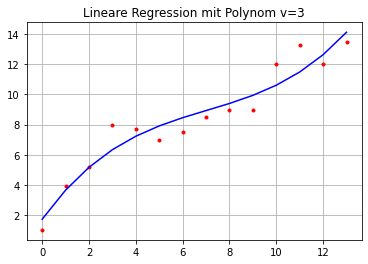

In [11]:
v = 3
poly_linear_regression = PolynomialLinearRegression(v=v)
poly_linear_regression.fit(Y, z)
predictions = poly_linear_regression.predict(Y)
visualisierung(Y, z, predictions=predictions, title = "Lineare Regression mit Polynom v=" + str(v))

### Grad v=4

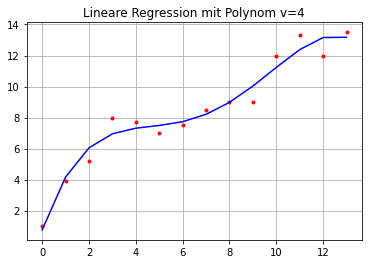

In [12]:
v = 4
poly_linear_regression = PolynomialLinearRegression(v=v)
poly_linear_regression.fit(Y, z)
predictions = poly_linear_regression.predict(Y)
visualisierung(Y, z, predictions=predictions, title = "Lineare Regression mit Polynom v=" + str(v))

### Grad v=5

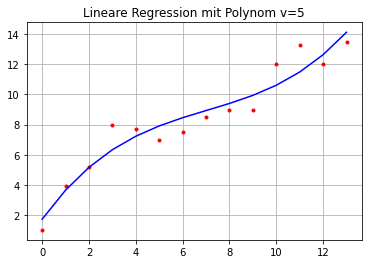

In [13]:
v = 5
poly_linear_regression = PolynomialLinearRegression(v=v)
poly_linear_regression.fit(Y, z)
predictions = poly_linear_regression.predict(Y)
visualisierung(Y, z, predictions=predictions, title = "Lineare Regression mit Polynom v=" + str(v))

Je höher der Grad des Polynoms ist, desto besser ist die Anpassung an die Trainingsdaten. Hier besteht jedoch die große Gefahr, dass es zu einer Überanpassung (overfit) der Trainingsdaten kommt. Dies führt zu schlechten Ergebnissen bei neuen, vorher nicht gesehenen Daten. Es wird hierbei von "auswendig Lernen" der Trainingsdaten gesprochen. Deshalb muss der Grad des Polynmos mit Bedacht gewählt werden. Es lässt sich jedoch erkennen, dass eine nicht lineare Funktion die hier generierten Daten besser abdecken kann, als eine linearen Funktion wie in Aufgabe 1 dieses Blattes.